## Aykırı Gözlem Analizi

**Aykırı Değerleri Yakalamak**

In [101]:
import seaborn as sns
import pandas as pd
import numpy as np
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [102]:
df_table=df.table

In [103]:
df_table.size

53940

In [104]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

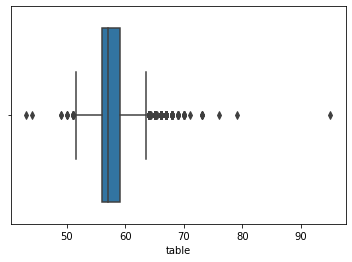

In [105]:
sns.boxplot(x=df_table);

In [106]:
Q1=df_table.quantile(0.25)

In [107]:
Q3=df_table.quantile(0.75)

In [108]:
IQR=Q3-Q1
IQR

3.0

In [109]:
Q1

56.0

In [110]:
Q3

59.0

In [111]:
alt_sinir=Q1-1.5*IQR

In [112]:
ust_sinir=Q3+1.5*IQR

In [113]:
alt_sinir,ust_sinir

(51.5, 63.5)

In [114]:
(df_table<alt_sinir) | (df_table>ust_sinir) 
aykırı_tf=(df_table<alt_sinir) 
aykırı_tf_ustsinir=(df_table>ust_sinir)

In [115]:
aykırı_tf_ustsinir.size

53940

In [116]:
aykırı_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [117]:
df_table[aykırı_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [118]:
df_table[aykırı_tf_ustsinir].size

589

In [119]:
df_table[aykırı_tf_ustsinir].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=589)

#### Silme İşlemi

In [120]:
df_table=pd.DataFrame(df_table)

In [121]:
df_table.shape

(53940, 1)

In [122]:
t_df=df_table[~((df_table<(alt_sinir)) | (df_table > (ust_sinir))).any(axis=1)]
t_df.size

53335

In [123]:
t_df.shape

(53335, 1)

In [135]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53335 entries, 0 to 53939
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   table   53335 non-null  float64
dtypes: float64(1)
memory usage: 833.4 KB


### Ortalama ile doldurma

In [124]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [125]:
df_table = df["table"]

In [126]:
aykırı_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [127]:
df_table[aykırı_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [128]:
df_table[aykırı_tf]=df_table.mean()

C:\Users\riza-\AppData\Local\Temp/ipykernel_10428/4138088697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykırı_tf]=df_table.mean()


In [129]:
df_table[aykırı_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

### Baskılama Yöntemi 

In [130]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [131]:
df_table = df["table"]

In [132]:
df_table[aykırı_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [133]:
df_table[aykırı_tf]=alt_sinir

C:\Users\riza-\AppData\Local\Temp/ipykernel_10428/342241276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykırı_tf]=alt_sinir


In [134]:
df_table[aykırı_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64